In [85]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os.path import join

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5}) 

# Copied from const.py in the `testbed` directory.
ID_2_MODEL = {0: "AlexNet", 1: "DenseNet", 2: "GoogLeNet", 3: "MobileNet", 4: "ResNet", 5: "SqueezeNet"}
filename, qos_filename = None, None

In [86]:
if filename is None:
    dirs = glob.glob("real-world/results/*/")
    most_recent_dir = sorted([d for d in dirs if "key_results" not in d]).pop()
    files = glob.glob(most_recent_dir + "*.csv")
    most_recent_file = sorted(files).pop()
    _filename = most_recent_file
else:
    _filename = filename

print(f"Loading file: {_filename}.")
data = pd.read_csv(_filename)
data = data.rename(columns={"algorithm": "Algorithm"})
data["served_model"] = data["served_model"].replace(ID_2_MODEL)
data.head()

Loading file: real-world/results/2021-03-05/00:04:23.961643.csv.


Unnamed: 0  index  req_accuracy  req_delay  req_id  served_delay  \
0           0      0      0.949941   0.305929     100      0.621967   
1           1      1      0.893088   0.254316     101      0.260104   
2           2      2      0.993501   0.306303     102      0.235354   
3           3      3      0.841829   0.298643     103      0.219565   
4           4      4      0.934514   0.330828     104      0.229720   

  served_model  served_pred  true_answer  high_acc  low_delay Algorithm  \
0    MobileNet          151          268     False      False       OPT   
1    MobileNet          213          236     False      False       OPT   
2    MobileNet          164          164     False      False       OPT   
3    MobileNet            8            7     False      False       OPT   
4    MobileNet          212          212     False      False       OPT   

   mc_run client_id served_model_name  served_pre_accuracy       QoS  \
0       0    rpi4-1         MobileNet              0.71878  0.833874   
1       0    rpi4-1         MobileNet              0.71878  0.886155   
2       0    rpi4-1         MobileNet              0.71878  0.938407   
3       0    rpi4-1         MobileNet              0.71878  0.836987   
4       0    rpi4-1         MobileNet              0.71878  0.890213   

   served_accuracy  post-QoS  
0         0.714913  0.724467  
1         0.714913  0.908018  
2         0.714913  0.860706  
3         0.714913  0.936542  
4         0.714913  0.890200

In [87]:
if qos_filename is None:
    dirs = glob.glob("real-world/qos_pred/*/")
    most_recent_dir = sorted([d for d in dirs if "key_results" not in d]).pop()
    files = glob.glob(most_recent_dir + "*.csv")
    most_recent_file = sorted(files).pop()
    _filename = most_recent_file
else:
    _filename = qos_filename

print(f"Loading file: {_filename}.")
qos_data = pd.read_csv(_filename)
qos_data["model_id"] = qos_data["model_id"].replace(ID_2_MODEL)
qos_data.head()

Loading file: real-world/qos_pred/2021-03-05/00:04:23.961643.csv.


Unnamed: 0  index       QoS       QoA       QoD     delay  delay_comm  \
0           0      0  0.773415  0.587793  0.959037  0.040963     0.00002   
1           1      1  0.661036  0.793953  0.528120  0.471880     0.00002   
2           2      2  0.795936  0.720353  0.871519  0.128481     0.00002   
3           3      3  0.841679  0.741353  0.942006  0.057994     0.00002   
4           4      4  0.817996  0.720153  0.915840  0.084160     0.00002   

   delay_comp   model_id  service_id  request_id client_id  
0    0.040943    AlexNet           0           0    jetson  
1    0.471860   DenseNet           0           0    jetson  
2    0.128461  GoogLeNet           0           0    jetson  
3    0.057974  MobileNet           0           0    jetson  
4    0.084140     ResNet           0           0    jetson

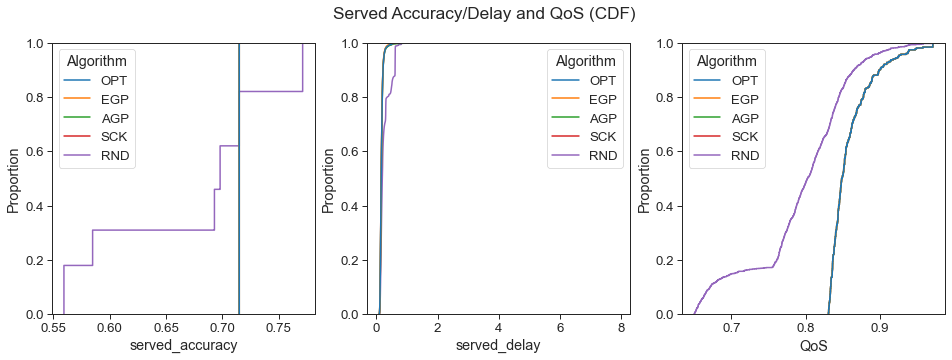

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.ecdfplot(x="served_accuracy", hue="Algorithm", ax=axes[0], data=data)
sns.ecdfplot(x="served_delay", hue="Algorithm", ax=axes[1], data=data)
sns.ecdfplot(x="QoS", hue="Algorithm", ax=axes[2], data=data)
fig.suptitle("Served Accuracy/Delay and QoS (CDF)")
plt.show()

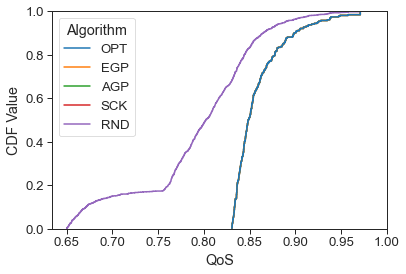

In [89]:
sns.ecdfplot(x="QoS", hue="Algorithm", data=data)
plt.ylabel("CDF Value")
plt.xticks([i/100 for i in range(65, 101, 5)])
plt.savefig("plots/real-world/qos-ecdf.pdf")
plt.show()

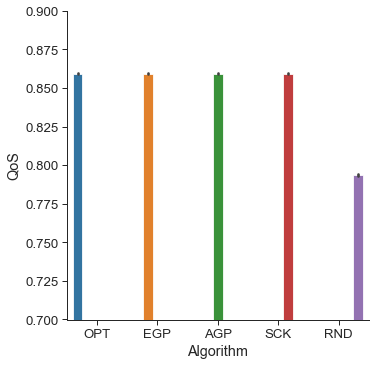

In [90]:
sns.catplot(x="Algorithm", y="QoS", hue="Algorithm", kind="bar", data=data)
plt.ylim(0.7, 0.9)
plt.show()

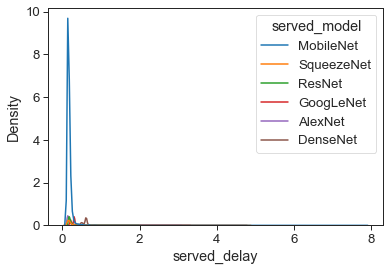

In [91]:
sns.kdeplot(data=data, x="served_delay", hue="served_model")
plt.show()

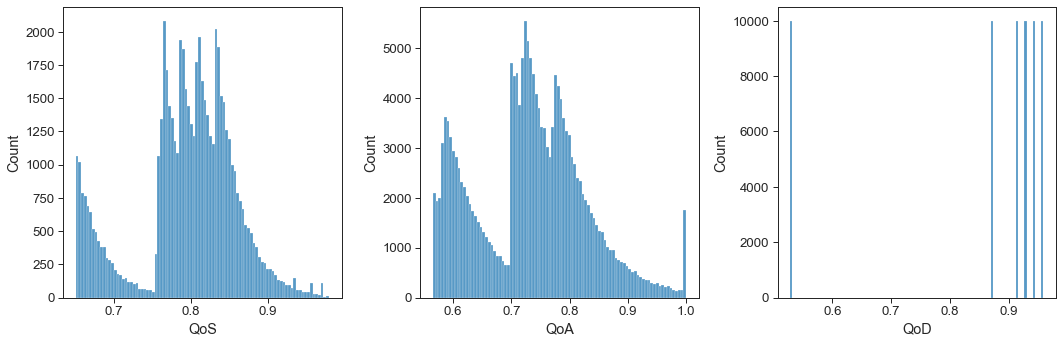

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=qos_data.query("client_id == 'jetson2'"), ax=axes[0], x="QoS")
sns.histplot(data=qos_data.query("client_id != ' '"), ax=axes[1], x="QoA")
sns.histplot(data=qos_data.query("client_id == 'jetson2'"), ax=axes[2], x="QoD")
plt.tight_layout()
plt.show()

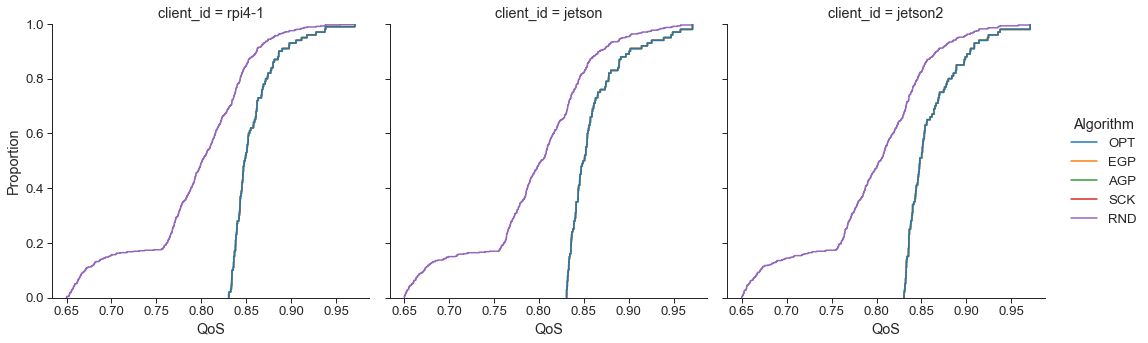

In [93]:
sns.displot(data=data, kind="ecdf", col="client_id", x="QoS", hue="Algorithm")
plt.show()

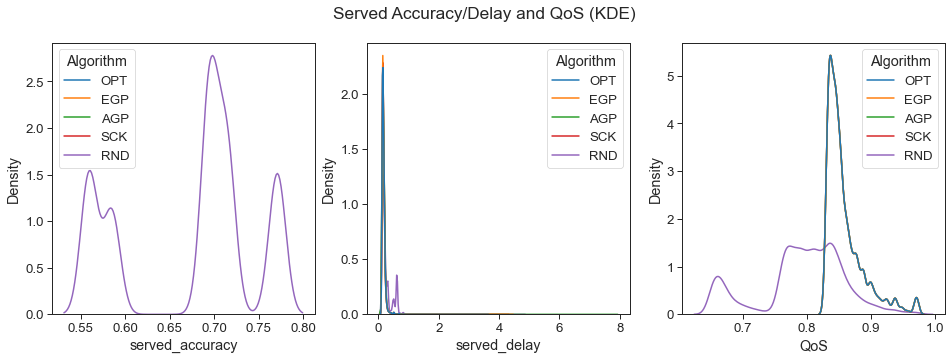

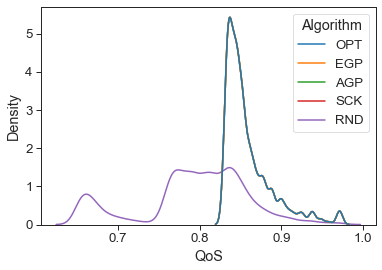

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.kdeplot(x="served_accuracy", hue="Algorithm", ax=axes[0], data=data)
sns.kdeplot(x="served_delay", hue="Algorithm", ax=axes[1], data=data)
sns.kdeplot(x="QoS", hue="Algorithm", ax=axes[2], data=data)
fig.suptitle("Served Accuracy/Delay and QoS (KDE)")
plt.show()

sns.kdeplot(x="QoS", hue="Algorithm", data=data)
plt.savefig("plots/real-world/qos-kde.pdf")
plt.show()

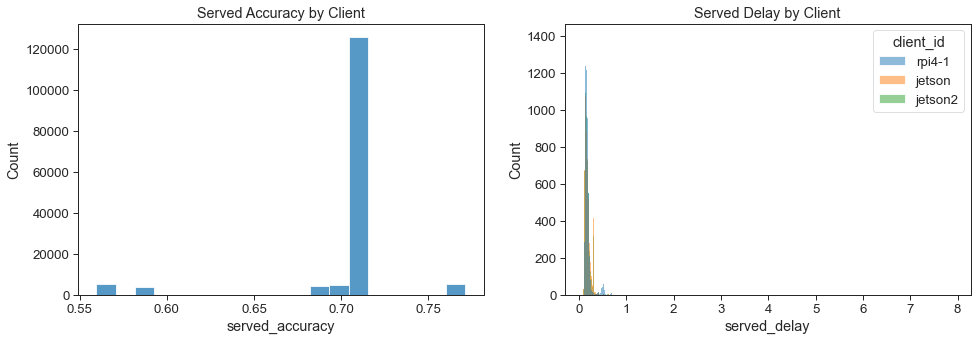

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# sns.histplot(x="served_delay", hue="client_id", ax=axes[0], data=data)
sns.histplot(x="served_accuracy", ax=axes[0], data=data)
sns.histplot(x="served_delay", hue="client_id", ax=axes[1], data=data)
axes[0].set_title("Served Accuracy by Client")
axes[1].set_title("Served Delay by Client")
plt.show()

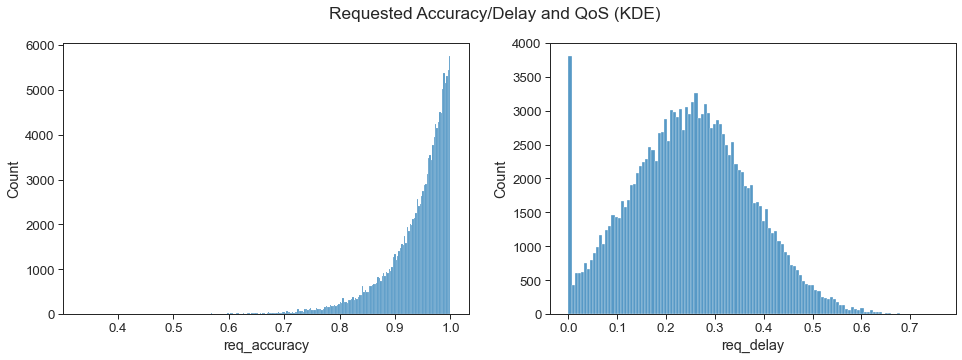

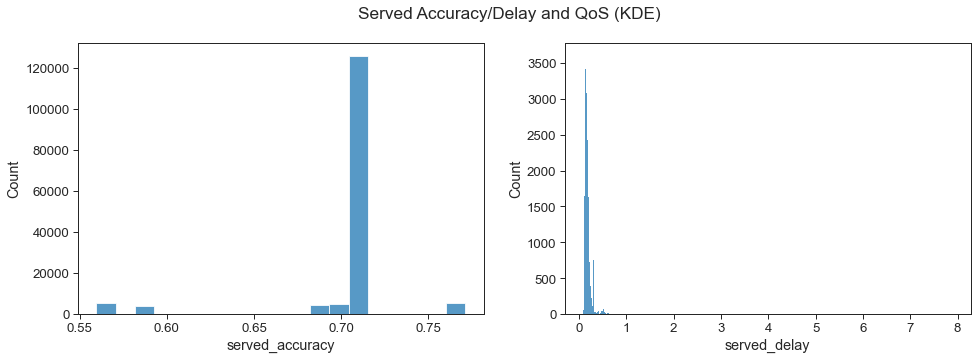

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(x="req_accuracy", ax=axes[0], data=data)
sns.histplot(x="req_delay", ax=axes[1], data=data)
fig.suptitle("Requested Accuracy/Delay and QoS (KDE)")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(x="served_accuracy", ax=axes[0], data=data)
sns.histplot(x="served_delay", ax=axes[1], data=data)
fig.suptitle("Served Accuracy/Delay and QoS (KDE)")
plt.show()

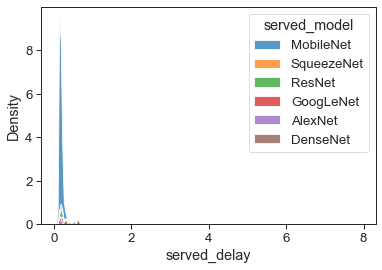

In [97]:
ax = sns.kdeplot(x="served_delay", hue="served_model", multiple="stack", data=data)
plt.show()

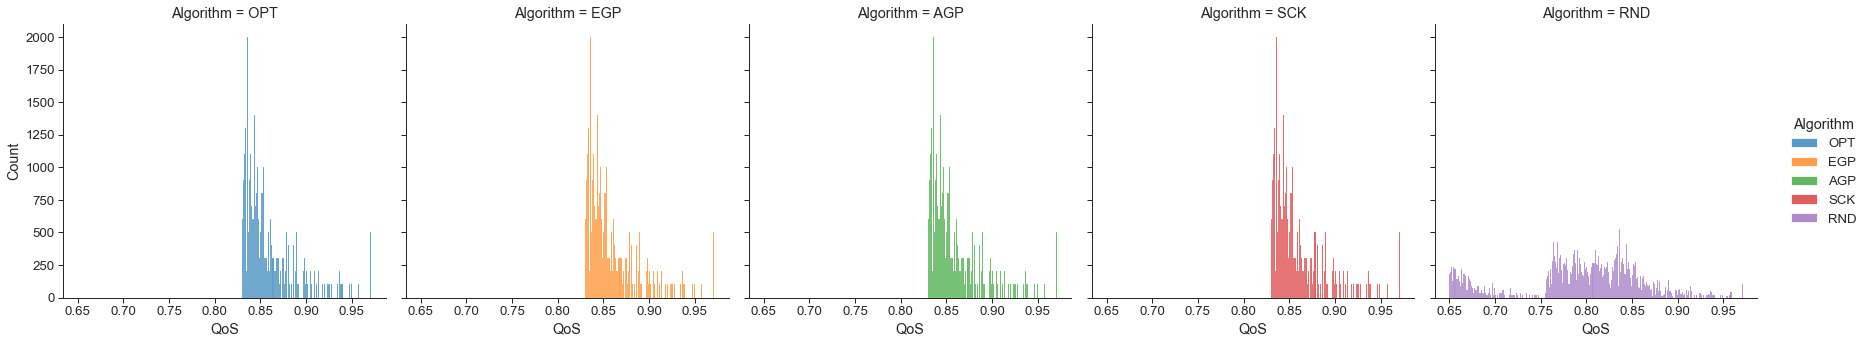

In [98]:
sns.displot(x="QoS", col="Algorithm", hue="Algorithm", data=data)
plt.show()

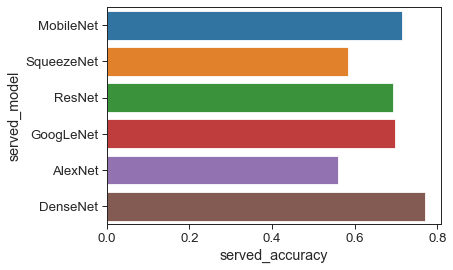

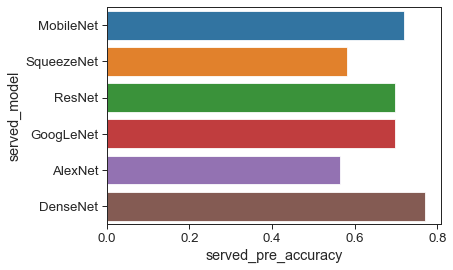

In [99]:
sns.barplot(x="served_accuracy",  y="served_model", data=data)
plt.show()

sns.barplot(x="served_pre_accuracy",  y="served_model", data=data)
plt.show()

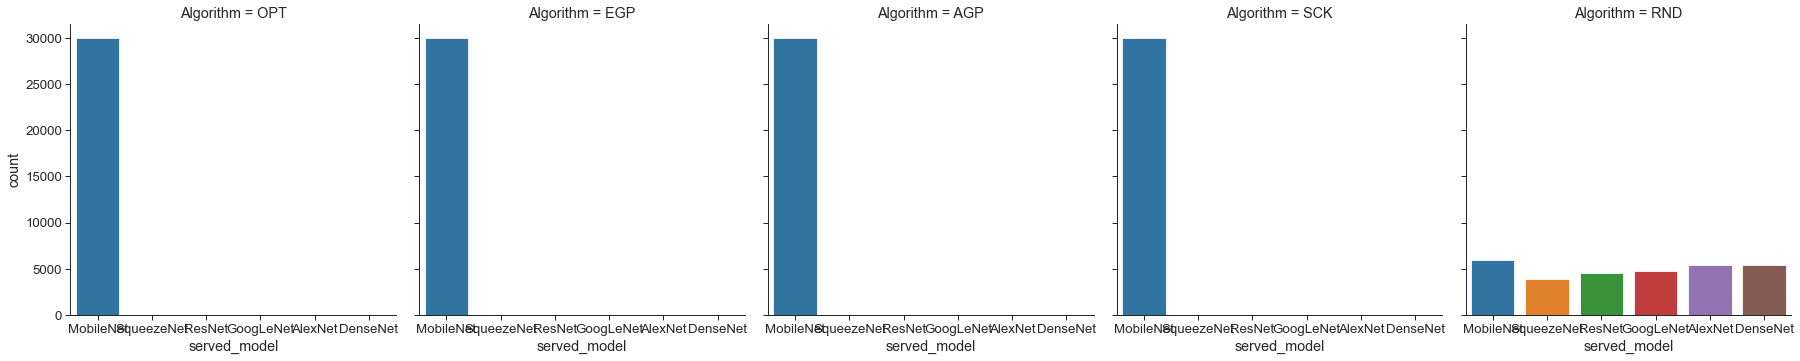

In [100]:
sns.catplot(x="served_model", col="Algorithm", kind="count", data=data)
plt.show()

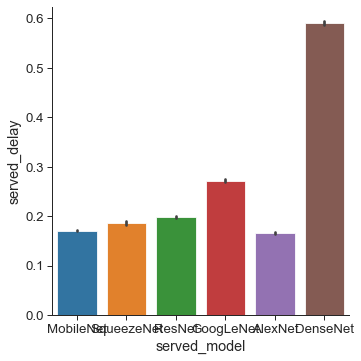

In [101]:
sns.catplot(x="served_model", y="served_delay", kind="bar", data=data)
plt.show()

In [102]:
data.head()

Unnamed: 0  index  req_accuracy  req_delay  req_id  served_delay  \
0           0      0      0.949941   0.305929     100      0.621967   
1           1      1      0.893088   0.254316     101      0.260104   
2           2      2      0.993501   0.306303     102      0.235354   
3           3      3      0.841829   0.298643     103      0.219565   
4           4      4      0.934514   0.330828     104      0.229720   

  served_model  served_pred  true_answer  high_acc  low_delay Algorithm  \
0    MobileNet          151          268     False      False       OPT   
1    MobileNet          213          236     False      False       OPT   
2    MobileNet          164          164     False      False       OPT   
3    MobileNet            8            7     False      False       OPT   
4    MobileNet          212          212     False      False       OPT   

   mc_run client_id served_model_name  served_pre_accuracy       QoS  \
0       0    rpi4-1         MobileNet              0.71878  0.833874   
1       0    rpi4-1         MobileNet              0.71878  0.886155   
2       0    rpi4-1         MobileNet              0.71878  0.938407   
3       0    rpi4-1         MobileNet              0.71878  0.836987   
4       0    rpi4-1         MobileNet              0.71878  0.890213   

   served_accuracy  post-QoS  
0         0.714913  0.724467  
1         0.714913  0.908018  
2         0.714913  0.860706  
3         0.714913  0.936542  
4         0.714913  0.890200

In [103]:
count_data = {
    "Algorithm": [],
    "Placed": [],
    "Model": [],
    "MC-Run": [],
}

algs = ["OPT", "EGP", "AGP", "SCK", "RND"]
models = sorted(list(data["served_model_name"].unique()))
mc_runs = set(data["mc_run"].unique())
total_num = 0
for r in mc_runs:
    for a in algs:
        subdata = data.query(f"Algorithm == '{a}' and mc_run == {r}")
        placed_models = set(subdata["served_model"].unique())
        for m in models:
            count_data["Algorithm"].append(a)
            count_data["Model"].append(m)
            count_data["MC-Run"].append(r)
            if m in placed_models:
                count_data["Placed"].append(1)
            else:
                count_data["Placed"].append(0)
            # count_data["Number of Placements"].append(len(subdata))
            # total_num += len(subdata)

count_data_df = pd.DataFrame.from_dict(count_data)
# count_data_df["Number of Placements"] /= total_num

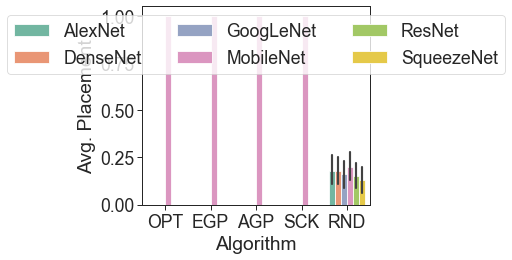

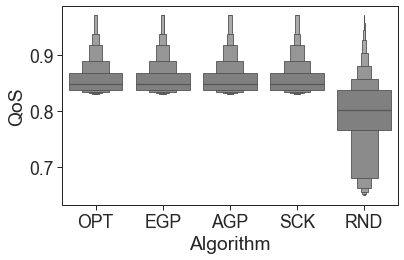

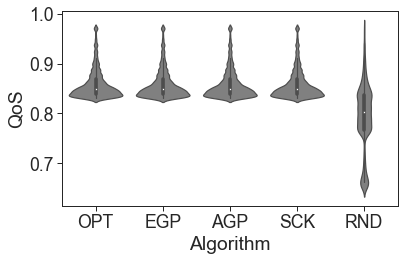

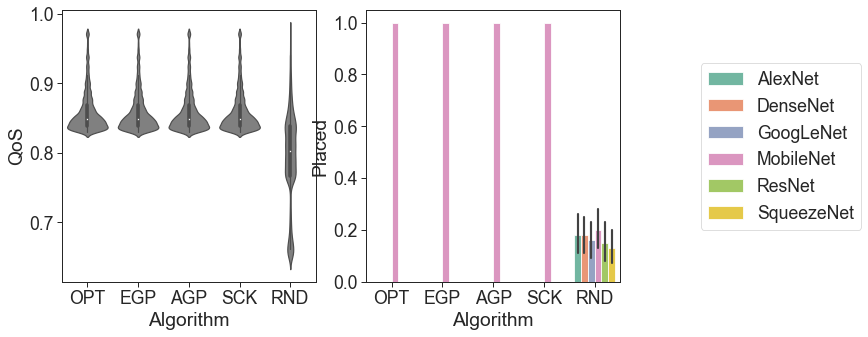

In [115]:
sns.set_context("paper", font_scale=2.0)

## Plotting the average amount of placement for each model across algorithms.
ax = sns.barplot(data=count_data_df, y="Placed", x="Algorithm", palette="Set2", hue="Model")
plt.ylabel("Avg. Placement")
handles, labels = ax.get_legend_handles_labels()
plt.legend(loc="upper center", ncol=len(labels)//2)
plt.tight_layout()
plt.savefig("plots/real-world/placement-bar.pdf")
plt.show()

## Plotting the distribution of Quality-of-Service across each algorithm.
sns.boxenplot(x="Algorithm", y="QoS", color="grey", data=data)
plt.xlabel("Algorithm")
plt.tight_layout()
plt.savefig("plots/real-world/qos-boxen.pdf")
plt.show()

## Plotting the distribution of Quality-of-Service across each algorithm.
sns.violinplot(x="Algorithm", y="QoS", color="grey", data=data)
plt.xlabel("Algorithm")
plt.tight_layout()
plt.savefig("plots/real-world/qos-violin.pdf")
plt.show()

## Make merged plot for the picture.
sns.set_context("paper", font_scale=1.5)

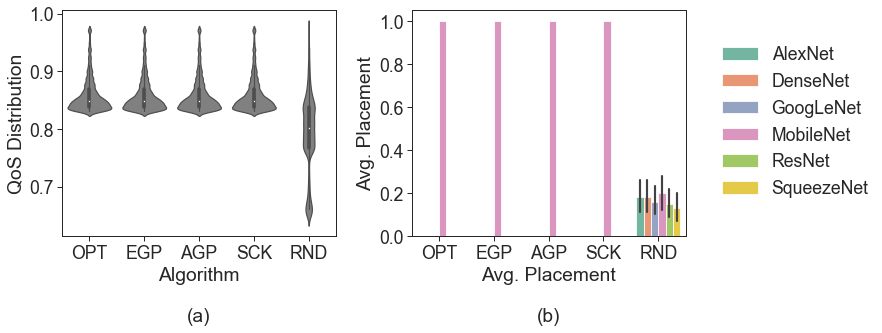

In [132]:
sns.set_context("paper", font_scale=2.0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot(x="Algorithm", y="QoS", color="grey", ax=axes[0], data=data)
ax = sns.barplot(data=count_data_df, y="Placed", x="Algorithm", palette="Set2", ax=axes[1], hue="Model")

handles, labels = axes[1].get_legend_handles_labels()
axes[1].get_legend().remove()
axes[0].set_ylabel("QoS Distribution")
axes[1].set_ylabel("Avg. Placement")
axes[0].set_xlabel("Algorithm\n\n(a)")
axes[1].set_xlabel("Avg. Placement\n\n(b)")

legend = fig.legend(handles, labels, loc="center left", frameon=False, bbox_to_anchor=(1, 0.625))
plt.tight_layout()
plt.savefig("plots/real-world/merged.pdf", bbox_extra_artists=(legend,), bbox_inches="tight")
plt.show()

sns.set_context("paper", font_scale=1.5)

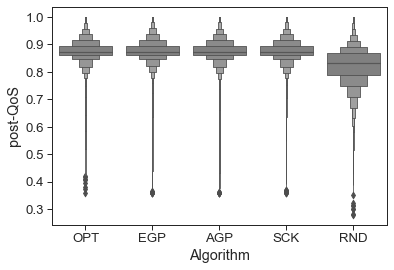

In [105]:
sns.boxenplot(x="Algorithm", y="post-QoS", color="grey", data=data)
plt.xlabel("Algorithm")
plt.savefig("plots/real-world/post-qos-boxen.pdf")
plt.show()

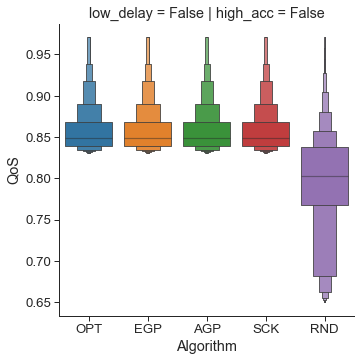

In [106]:
sns.catplot(x="Algorithm", y="QoS", col="high_acc", row="low_delay", kind="boxen", data=data)
plt.show()

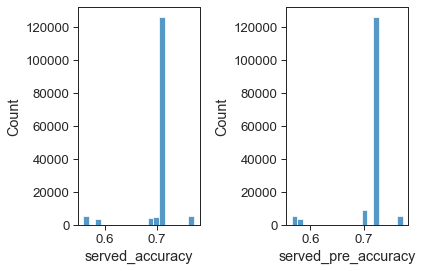

In [107]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data=data, ax=axes[0], x="served_accuracy")
sns.histplot(data=data, ax=axes[1], x="served_pre_accuracy")
plt.tight_layout()
plt.show()

In [108]:
data["served_accuracy"].describe()

count    150000.000000
mean          0.706753
std           0.037158
min           0.559444
25%           0.714913
50%           0.714913
75%           0.714913
max           0.771111
Name: served_accuracy, dtype: float64

In [109]:
opt = np.array(sorted(list(data.query("Algorithm == 'OPT'")["QoS"])))
egp = np.array(sorted(list(data.query("Algorithm == 'EGP'")["QoS"])))
agp = np.array(sorted(list(data.query("Algorithm == 'AGP'")["QoS"])))
sck = np.array(sorted(list(data.query("Algorithm == 'SCK'")["QoS"])))
rnd = np.array(sorted(list(data.query("Algorithm == 'RND'")["QoS"])))

print(f"EGP's approximation ratio: {np.mean(egp/opt):0.3f}")
print(f"AGP's approximation ratio: {np.mean(agp/opt):0.3f}")
print(f"SCK's approximation ratio: {np.mean(sck/opt):0.3f}")
print(f"RND's approximation ratio: {np.mean(rnd/opt):0.3f}")

EGP's approximation ratio: 1.000
AGP's approximation ratio: 1.000
SCK's approximation ratio: 1.000
RND's approximation ratio: 0.923


In [110]:
data["mc_run"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])